<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Retirement_age1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Replacement Rate: 70.00%


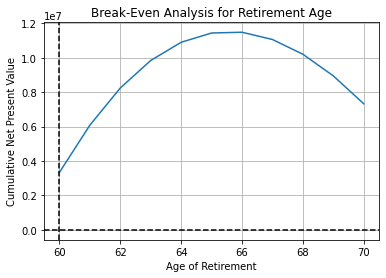

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define variables
wage = 50000 # Annual wage
retirement_age = np.arange(60, 71) # Range of retirement ages to evaluate
life_expectancy = 75.1 # Life expectancy 85
retirement_cost = 0.7 # Proportion of wage required in retirement 0.8
discount_rate = 0.06 # Discount rate for future earnings          0.03
annual_pre_retirement_income = 100000 # $100,000 per year
annual_retirement_income = 70000 # $70,000 per year
replacement_rate = (annual_retirement_income / annual_pre_retirement_income) * 100
print("Replacement Rate: {:.2f}%".format(replacement_rate))
retirement_cost = replacement_rate/100

# Calculate total value of earnings if retired at different ages
earnings = pd.DataFrame(index=retirement_age, columns=['Total Earnings', 'Total Benefits'])
for age in retirement_age:
    remaining_work_years = life_expectancy - age
    total_earnings = wage * (age - 20) # Assume starting work at age 20
    total_benefits = wage * retirement_cost * remaining_work_years * (1 + discount_rate)**(-1 * np.arange(1, remaining_work_years + 1))
    earnings.loc[age, 'Total Earnings'] = total_earnings
    earnings.loc[age, 'Total Benefits'] = total_benefits.sum()

# Calculate break-even point
earnings['Net Present Value'] = earnings['Total Benefits'] - earnings['Total Earnings']
earnings['Cumulative NPV'] = earnings['Net Present Value'].cumsum()
earnings['Break-Even Age'] = earnings.index[earnings['Cumulative NPV'] >= 0][0]

# Plot results
fig, ax = plt.subplots()
ax.plot(retirement_age, earnings['Cumulative NPV'])
ax.axhline(y=0, linestyle='--', color='k')
#ax.axvline(x=earnings['Break-Even Age'], linestyle='--', color='k')
ax.axvline(x=earnings['Break-Even Age'].iloc[0], linestyle='--', color='k')

ax.set_xlabel('Age of Retirement')
ax.set_ylabel('Cumulative Net Present Value')
ax.set_title('Break-Even Analysis for Retirement Age')
ax.grid(True)
plt.show()
